In [11]:
import sys
from pathlib import Path

# Add project root to sys.path
project_root = Path().resolve().parent  # Adjust if notebook is inside notebooks/
sys.path.append(str(project_root))


In [13]:
# Import modules
from src.data_loader import load_csv
from src.preprocessing import drop_columns, remove_outliers, add_time_features
from src.visualization import (
    lineplot_timeseries, barplot_by_time, correlation_heatmap,
    scatter_plots, wind_rose, bubble_chart
)
from src.analysis import cleaning_impact


In [14]:
# Load data
df = load_csv("../data/raw/togo-dapaong_qc.csv", parse_dates=["Timestamp"])

In [18]:
# Clean data
df = drop_columns(df, ["Comments"])
numeric_cols = ["GHI", "DNI", "DHI", "ModA", "ModB", "WS", "WSgust"]
df_clean = remove_outliers(df, numeric_cols)

In [19]:
# Add features
df_clean = add_time_features(df_clean)

In [20]:
# Quick stats
df_clean.describe()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Hour,Year
count,516349,516349.000000,516349.000000,516349.000000,516349.000000,516349.000000,516349.000000,516349.000000,516349.000000,516349.000000,516349.000000,516349.000000,516349.000000,516349.000000,516349.000000,516349.000000,516349.000000,516349.000000,516349.000000,516349.000000
mean,2022-04-25 13:20:08.506455808,223.859675,147.975931,112.781249,219.380751,213.028150,27.727474,55.182807,2.312185,3.154247,0.548049,162.129322,10.491499,975.893919,0.000529,0.000952,32.312313,33.378512,11.497936,2021.811964
min,2021-10-25 00:01:00,-12.700000,0.000000,0.000000,0.000000,0.000000,14.900000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,968.000000,0.000000,0.000000,13.100000,13.100000,0.000000,2021.000000
25%,2022-01-23 20:12:00,-2.200000,0.000000,0.000000,0.000000,0.000000,24.200000,26.800000,1.400000,1.900000,0.400000,74.700000,6.800000,975.000000,0.000000,0.000000,23.800000,23.600000,5.000000,2022.000000
50%,2022-04-25 22:55:00,0.500000,0.000000,1.500000,2.800000,2.800000,27.200000,59.400000,2.200000,2.900000,0.500000,200.200000,10.700000,976.000000,0.000000,0.000000,28.200000,28.200000,12.000000,2022.000000
75%,2022-07-25 23:21:00,423.200000,237.900000,211.600000,404.100000,393.100000,31.000000,81.000000,3.200000,4.100000,0.700000,233.700000,14.000000,977.000000,0.000000,0.000000,40.300000,42.600000,18.000000,2022.000000
max,2022-10-25 00:00:00,1198.000000,904.100000,586.000000,1171.200000,1143.000000,41.400000,99.800000,6.700000,8.800000,2.700000,360.000000,86.900000,983.000000,1.000000,1.800000,70.400000,94.600000,23.000000,2022.000000
std,NaN,317.306277,247.683690,151.571744,311.854841,302.625802,4.757337,28.698318,1.377997,1.762192,0.252824,92.028704,5.915056,2.147358,0.022988,0.018621,10.957090,12.718462,6.959371,0.390741


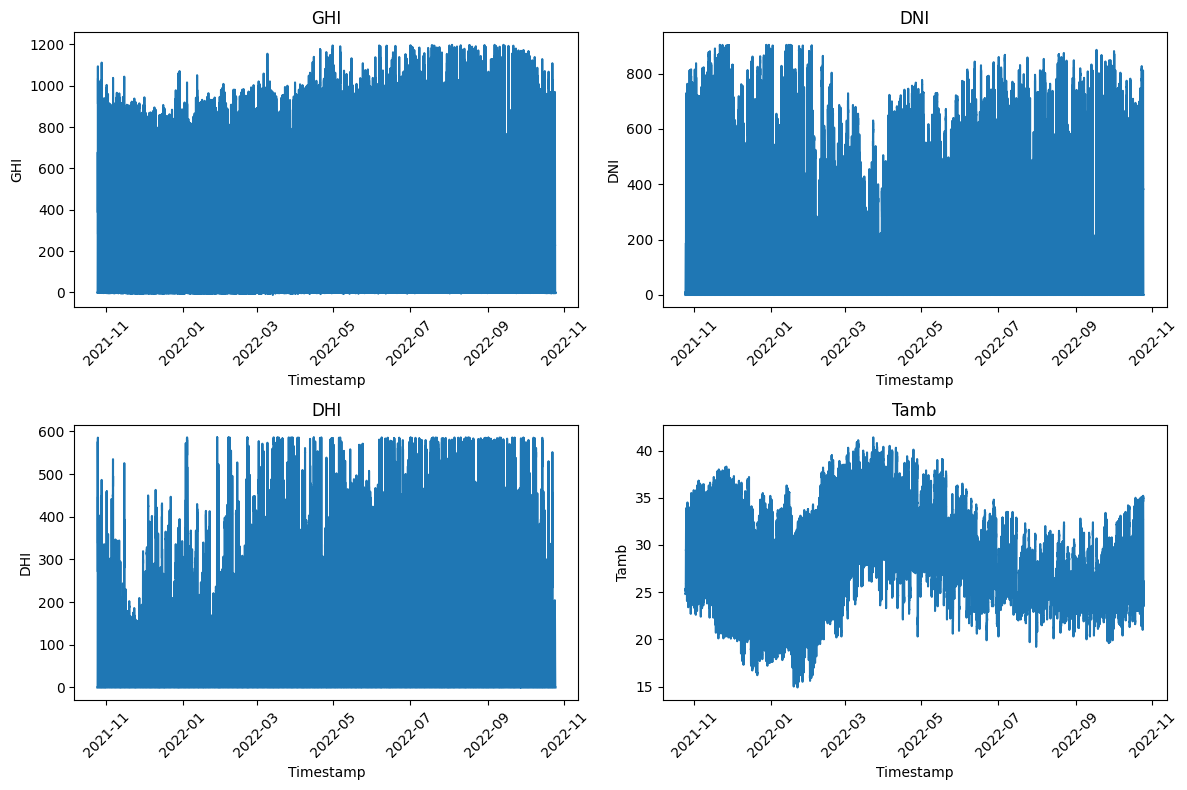

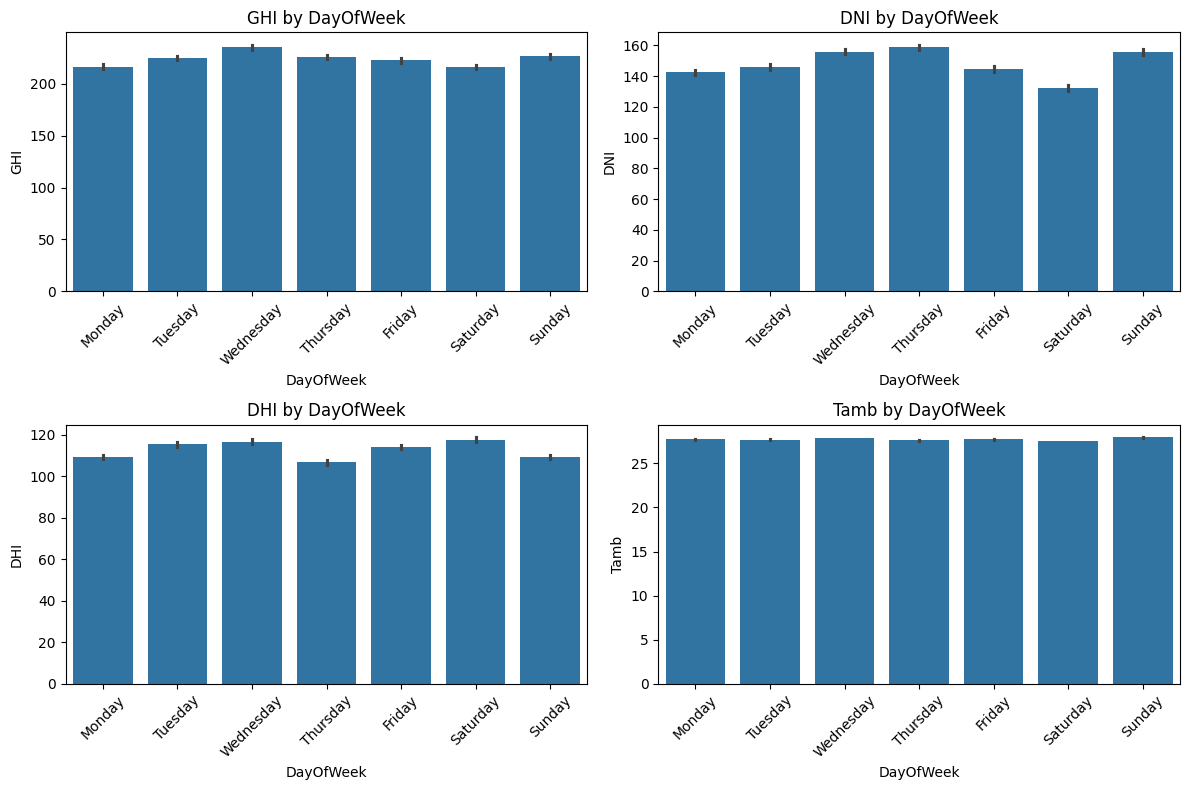

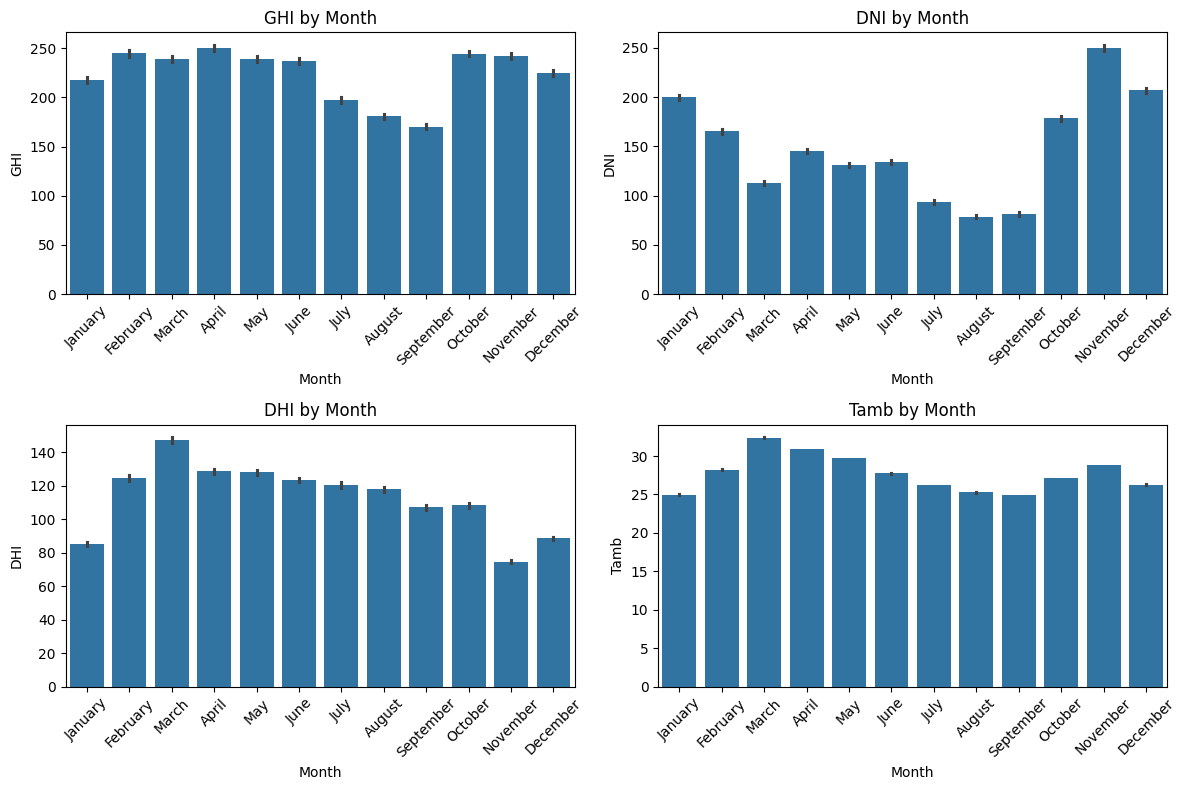

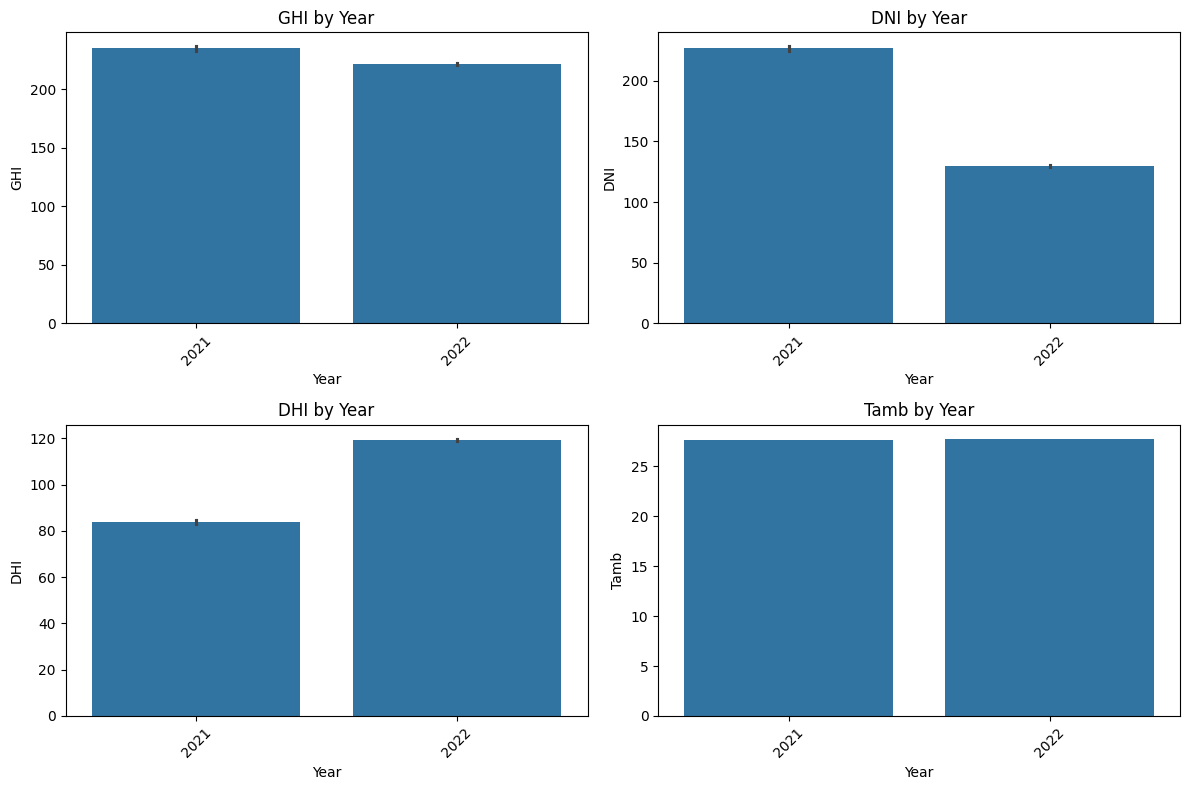

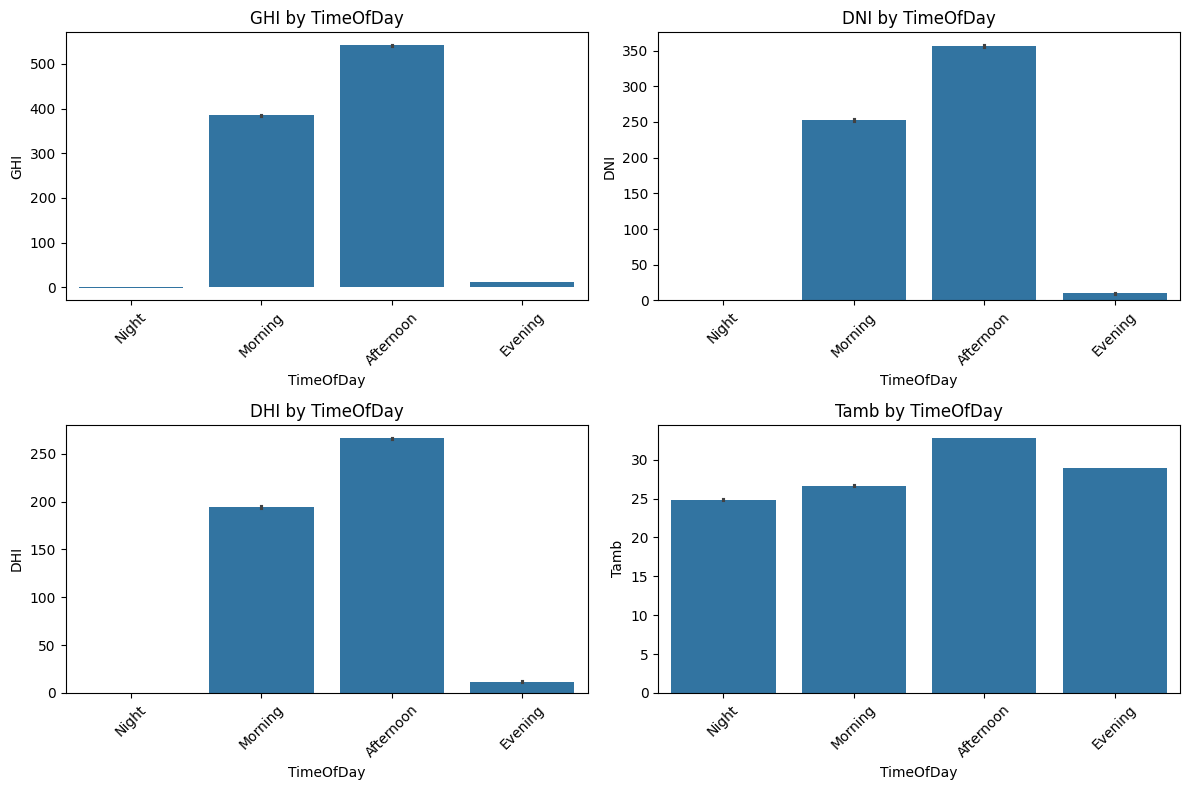

In [21]:
# Visualizations
lineplot_timeseries(df_clean, ["GHI","DNI","DHI","Tamb"])
barplot_by_time(df_clean, ["GHI","DNI","DHI","Tamb"], "DayOfWeek",
                order=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
barplot_by_time(df_clean, ["GHI","DNI","DHI","Tamb"], "Month",
                order=["January","February","March","April","May","June",
                       "July","August","September","October","November","December"])
barplot_by_time(df_clean, ["GHI","DNI","DHI","Tamb"], "Year")
barplot_by_time(df_clean, ["GHI","DNI","DHI","Tamb"], "TimeOfDay")

<Axes: title={'center': 'Average Module Reading Pre/Post Cleaning'}, xlabel='Cleaning'>

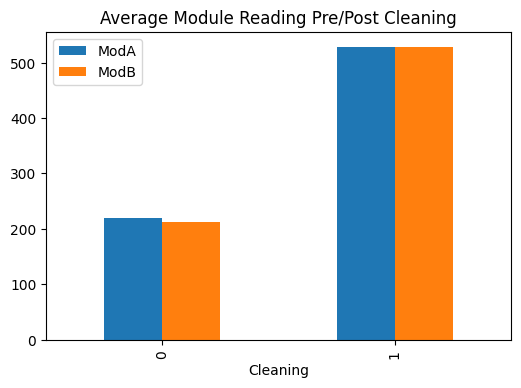

In [22]:
# Cleaning impact
impact = cleaning_impact(df_clean)
impact.plot(kind="bar", figsize=(6,4), title="Average Module Reading Pre/Post Cleaning")

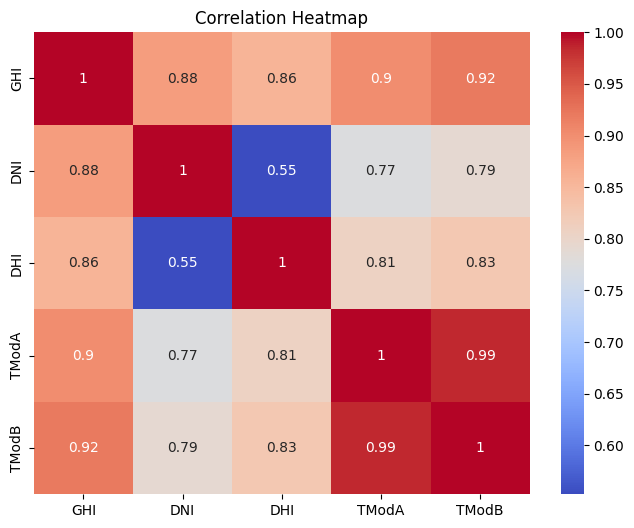

In [23]:
# Correlation
corr = correlation_heatmap(df_clean, ["GHI","DNI","DHI","TModA","TModB"])

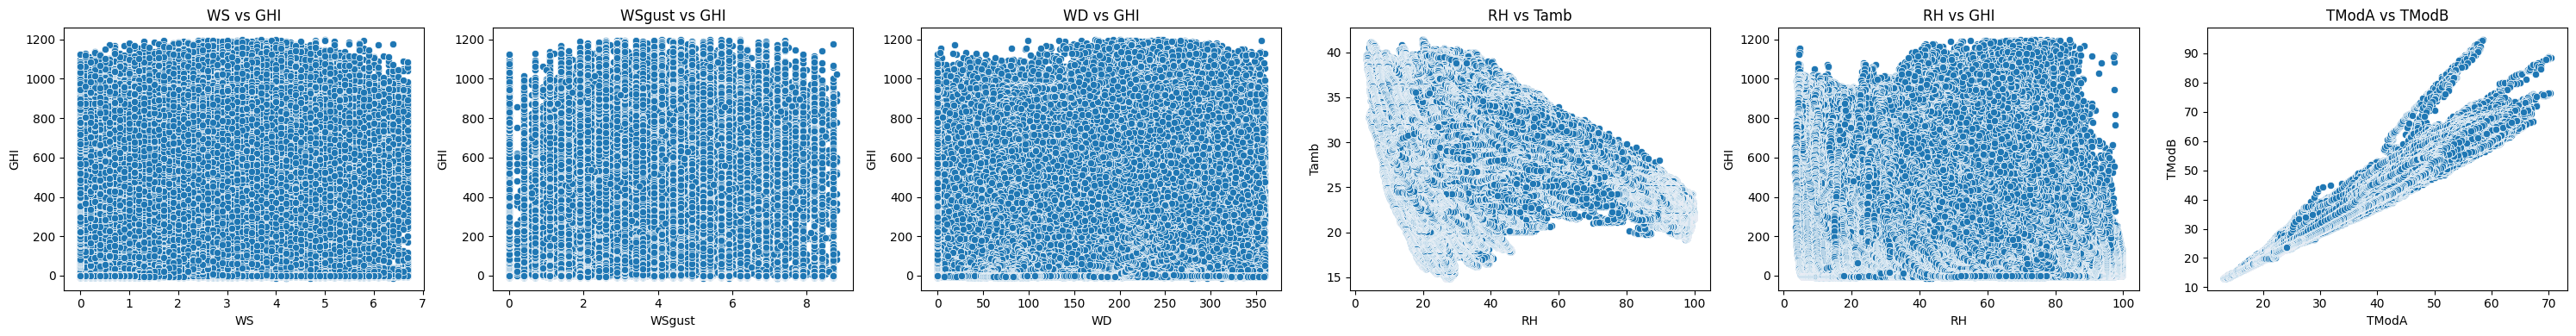

In [24]:
# Scatter plots
scatter_plots(df_clean, [("WS","GHI"), ("WSgust","GHI"), ("WD","GHI"), ("RH","Tamb"), ("RH","GHI"), ("TModA","TModB")])

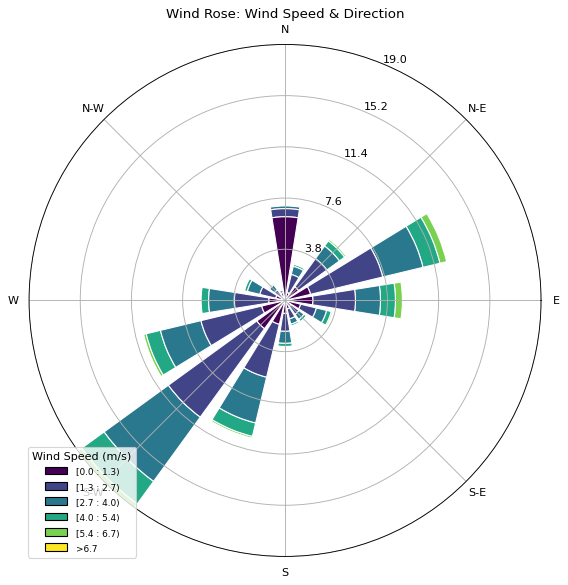

In [25]:
# Wind rose
wind_rose(df_clean)

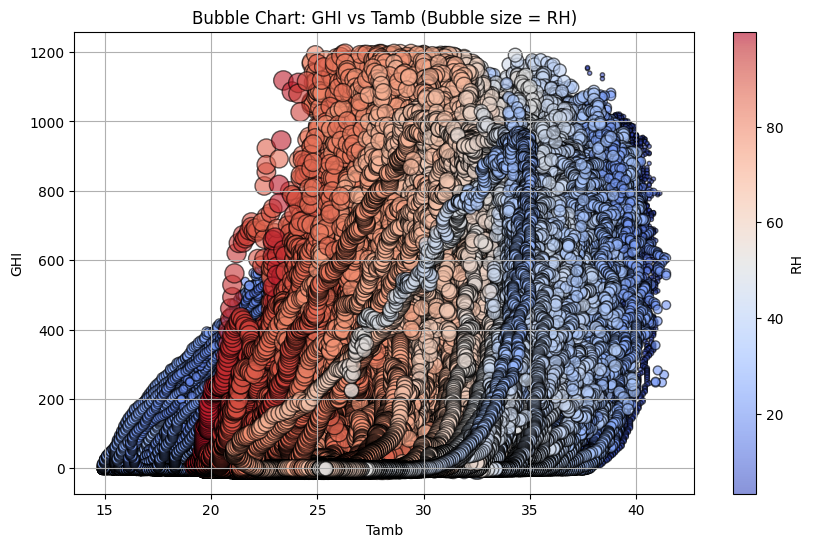

In [26]:
# Bubble chart
bubble_chart(df_clean, "Tamb", "GHI", size_col="RH", color_col="RH")

In [28]:
# Save cleaned data
df_clean.to_csv("../data/processed/togo_clean.csv", index=False)